# Linear Regression in PySpark

This Notebook was originally created in Databricks. You can sign up for the [free community edition](https://community.cloud.databricks.com/) of Databricks then import this notebook. To learn more about Databricks community edition, [read the FAQ here](https://databricks.com/product/faq/community-edition).  

This is a very basic introduction on how to build a linear regression model on Spark using Python.  

Here are reference docs on Linear Regression in PySpark.  

- https://spark.apache.org/docs/latest/mllib-linear-methods.html#regression
- https://spark.apache.org/docs/latest/api/python/pyspark.ml.html#pyspark.ml.regression.LinearRegression
- https://docs.databricks.com/spark/latest/mllib/index.html

In [0]:
import numpy as np

# generate a random and uniform 2D matrix of correlated data
# source: https://stackoverflow.com/a/18684433/5356898

xx = np.array([-0.51, 51.2])
yy = np.array([0.33, 51.6])
means = [xx.mean(), yy.mean()]  
stds = [xx.std() / 3, yy.std() / 3]
corr = 0.8 # correlation
covs = [[stds[0]**2          , stds[0]*stds[1]*corr], 
        [stds[0]*stds[1]*corr,           stds[1]**2]] 

data = np.random.multivariate_normal(means, covs, 1000)

In [0]:
stds

Out[24]: [8.618333333333334, 8.545]

In [0]:
data.shape

Out[2]: (1000, 2)

In [0]:
data

Out[3]: array([[19.13187581, 24.12081435],
       [39.85103025, 28.15615961],
       [36.94429014, 36.80204084],
       ...,
       [36.39567122, 32.91404565],
       [32.52053764, 27.56886414],
       [22.16088666, 28.49480035]])

In [0]:
rdd1 = sc.parallelize(data)
rdd2 = rdd1.map(lambda x: [float(i) for i in x])
df = rdd2.toDF(["y","x"])

In [0]:
rdd2.collect()

Out[5]: [[19.131875808296165, 24.120814351009884],
 [39.851030247108206, 28.15615961229035],
 [36.944290139808366, 36.802040842708315],
 [34.106617488723586, 28.448910127642748],
 [28.349019651026737, 27.956409251300364],
 [13.734461215127327, 10.543351240421332],
 [22.782350990193798, 19.470054898106454],
 [15.049628133207591, 13.887705017398885],
 [33.5420303882533, 41.75140471701127],
 [31.797102544102223, 27.297519017859173],
 [28.599569413103623, 36.5263260240763],
 [14.735445202453784, 17.589863879062346],
 [28.475617329358357, 27.042440980980313],
 [28.432381421037903, 25.198925589495115],
 [12.872549648038381, 24.093438466345493],
 [29.972072856565283, 31.114410734253866],
 [21.927535287970503, 28.8237569404576],
 [30.252624505742133, 31.401069309590312],
 [23.266534191584768, 21.01867410326378],
 [33.655351471652324, 37.219157780538616],
 [29.02069774312987, 24.138704492063034],
 [24.82357741745233, 25.173547165123082],
 [39.34227497755445, 27.607944350368047],
 [35.1669529909

In [0]:
rdd1.collect()

Out[6]: [array([19.13187581, 24.12081435]),
 array([39.85103025, 28.15615961]),
 array([36.94429014, 36.80204084]),
 array([34.10661749, 28.44891013]),
 array([28.34901965, 27.95640925]),
 array([13.73446122, 10.54335124]),
 array([22.78235099, 19.4700549 ]),
 array([15.04962813, 13.88770502]),
 array([33.54203039, 41.75140472]),
 array([31.79710254, 27.29751902]),
 array([28.59956941, 36.52632602]),
 array([14.7354452 , 17.58986388]),
 array([28.47561733, 27.04244098]),
 array([28.43238142, 25.19892559]),
 array([12.87254965, 24.09343847]),
 array([29.97207286, 31.11441073]),
 array([21.92753529, 28.82375694]),
 array([30.25262451, 31.40106931]),
 array([23.26653419, 21.0186741 ]),
 array([33.65535147, 37.21915778]),
 array([29.02069774, 24.13870449]),
 array([24.82357742, 25.17354717]),
 array([39.34227498, 27.60794435]),
 array([35.16695299, 32.38417262]),
 array([17.9396538 , 17.15013289]),
 array([34.39083998, 25.02953241]),
 array([28.80588974, 25.63635699]),
 array([19.54108911,

In [0]:
df.head(5)

Out[8]: [Row(y=19.131875808296165, x=24.120814351009884),
 Row(y=39.851030247108206, x=28.15615961229035),
 Row(y=36.944290139808366, x=36.802040842708315),
 Row(y=34.106617488723586, x=28.448910127642748),
 Row(y=28.349019651026737, x=27.956409251300364)]

In [0]:
display(df)

y,x
19.131875808296165,24.120814351009884
39.851030247108206,28.15615961229035
36.944290139808366,36.802040842708315
34.106617488723586,28.448910127642748
28.349019651026737,27.956409251300364
13.734461215127327,10.543351240421332
22.782350990193798,19.470054898106454
15.049628133207591,13.887705017398885
33.5420303882533,41.75140471701127
31.797102544102223,27.297519017859173


In [0]:
from pyspark.ml.regression import LinearRegression, LinearRegressionSummary
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.evaluation import RegressionEvaluator
from pyspark.ml import Pipeline

assembler = VectorAssembler(inputCols=["x"], outputCol="features")

lr = LinearRegression(labelCol="y")

pipeline = Pipeline(stages=[assembler, lr])

train, test = df.randomSplit([0.75, 0.25])

model = pipeline.fit(train)

predictions = model.transform(test)

eval = RegressionEvaluator(labelCol="y", predictionCol="prediction")

# uncomment below for help
#help(eval)
#for line in eval.explainParams().split('\n'):
#  print(line)

print('RMSE:', eval.evaluate(predictions, {eval.metricName: "rmse"}))
print('R-squared:', eval.evaluate(predictions, {eval.metricName: "r2"}))

RMSE: 5.252307654289622
R-squared: 0.6014348212642655


In [0]:
print("Coefficients: " + str(model.stages[-1].coefficients))
print("Intercept: " + str(model.stages[-1].intercept))

Coefficients: [0.8280246098719133]
Intercept: 3.9455276360902647


In [0]:
y = 0.82*x + 3.94

In [0]:
import matplotlib.pyplot as plt



In [0]:
predictions.head()

Out[21]: Row(y=9.28214884692213, x=9.427838961856342, features=DenseVector([9.4278]), prediction=11.752010314416586)

Out[25]: Text(0.5, 1.0, 'Predicted values vs Ground Truth')

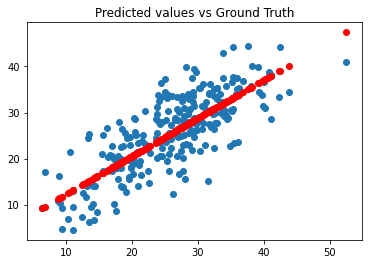

In [0]:
plt.scatter(predictions.select('x').collect(), predictions.select('y').collect(), label="origincal")
plt.scatter(predictions.select('x').collect(), predictions.select('prediction').collect(), 
            c='red',
            label="predicted")
plt.title("Predicted values vs Ground Truth")

In [0]:
help(plt.scatter)

Help on function scatter in module matplotlib.pyplot:

scatter(x, y, s=None, c=None, marker=None, cmap=None, norm=None, vmin=None, vmax=None, alpha=None, linewidths=None, *, edgecolors=None, plotnonfinite=False, data=None, **kwargs)
    A scatter plot of *y* vs. *x* with varying marker size and/or color.
    
    Parameters
    ----------
    x, y : float or array-like, shape (n, )
        The data positions.
    
    s : float or array-like, shape (n, ), optional
        The marker size in points**2.
        Default is ``rcParams['lines.markersize'] ** 2``.
    
    c : array-like or list of colors or color, optional
        The marker colors. Possible values:
    
        - A scalar or sequence of n numbers to be mapped to colors using
          *cmap* and *norm*.
        - A 2D array in which the rows are RGB or RGBA.
        - A sequence of colors of length n.
        - A single color format string.
    
        Note that *c* should not be a single numeric RGB or RGBA sequence
    

In [0]:
test

Out[12]: DataFrame[y: double, x: double]

In [0]:
test.head(5)

Out[13]: [Row(y=9.28214884692213, x=9.427838961856342),
 Row(y=11.57182019596752, x=13.082288704676191),
 Row(y=12.843884155288448, x=19.05969879723028),
 Row(y=16.159698940960197, x=8.916245808425074),
 Row(y=16.725110430265424, x=27.111101376691717)]